In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
from cycler import cycler
COLORS = ['#F00D2C', '#242482', '#0071BE', '#4E8F00', '#553C67', '#DA5319']
default_cycler = cycler(color=COLORS)
plt.rc('axes', prop_cycle=default_cycler) 
# -----------------------------

# This will be used to make the 3d plots interactive
%matplotlib notebook

# Examples of the linear model

For linear regression, we use the linear model
$$ y(x) = \theta_1 \varphi_1(x) + \theta_2 \varphi_2(x) + ... + \theta_n \varphi_n(x),$$

The functions $\varphi_j(x)$ are called **basis functions**, and they have to be specified before we can
run linear regression. Choosing the best basis functions for your given data is a kind of art. Below, we'll explore a few simple examples.

### Example 1

Here, our choice of basis functions are:
* $ \mathbf x = (x_1, x_2)$
* $ \varphi_1(x_1, x_2) = x_1$
* $ \varphi_2(x_1, x_2) = x_2$

This results in the model:
$$ y = \theta_1 x_1 + \theta_2 x_2 $$

Let's plot this for a choice of the parameters $\theta = (\theta_1, \theta_2)^T$

In [12]:
theta_1 = -1
theta_2 = 0.5

# We'll plot the model function in the interval [-1, 1] for both input variables
x1 = np.linspace(-1, 1, 10)
x2 = np.linspace(-1, 1, 10)

# Form all pairs of points (x_1, x_2)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate the function at all the point
y = theta_1*X1 + theta_2*X2

Since we have 2 inputs and one output, to plot $y$ versus $x_1$ and $x_2$, we'll make 3D surface plot. To plot the surface, we need to use `matplotlib`'s 3D functionality.

<IPython.core.display.Javascript object>


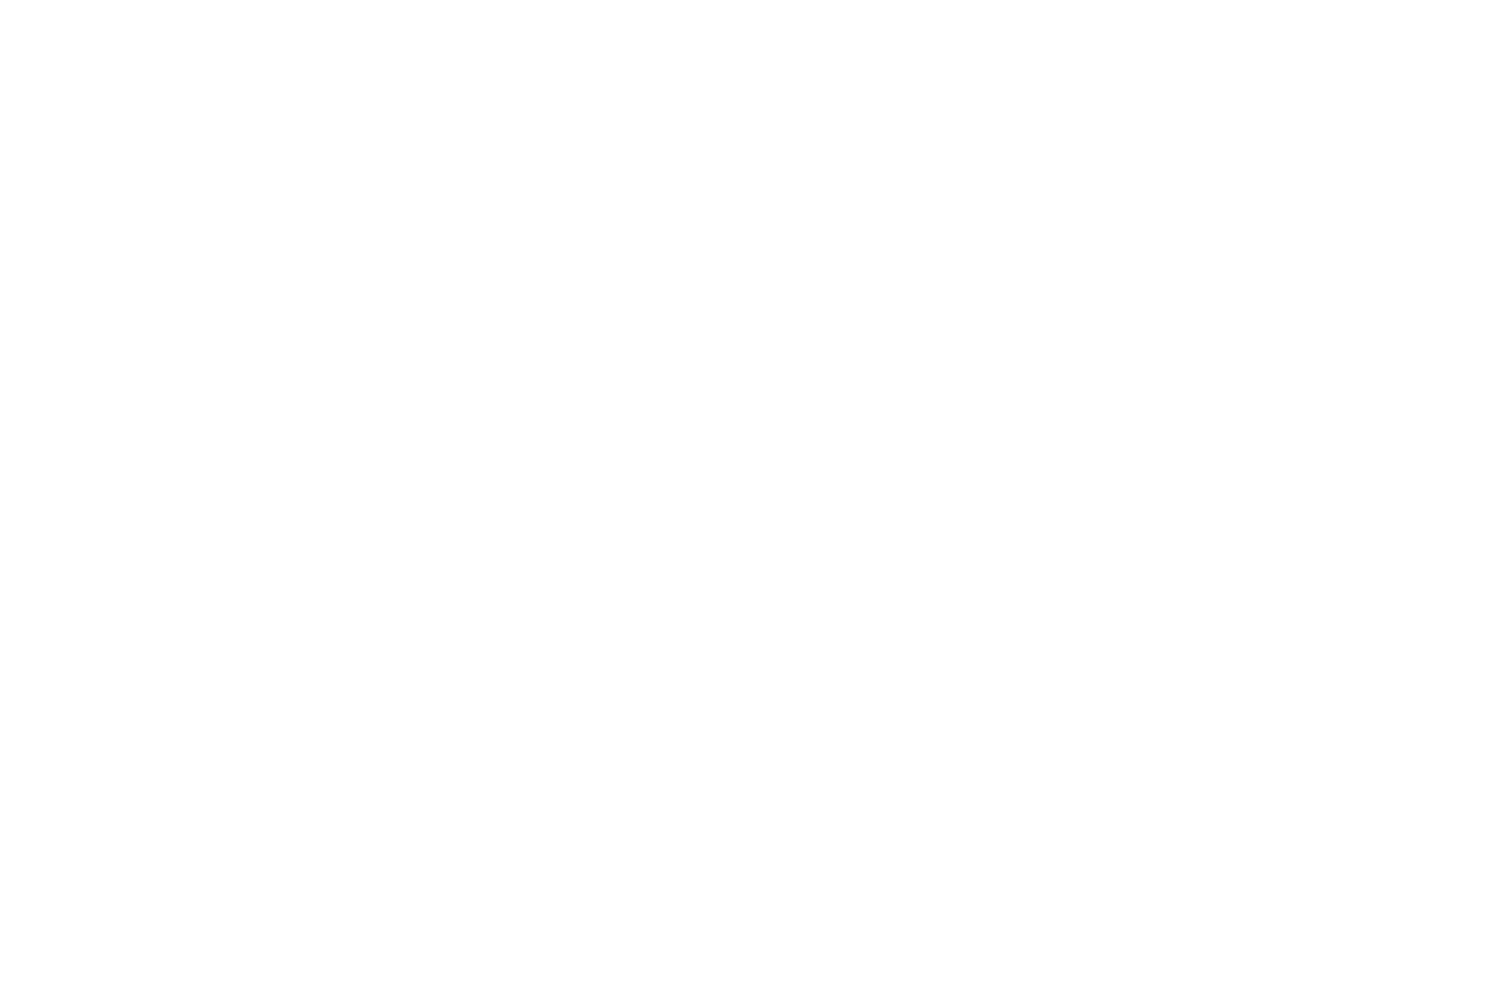

<IPython.core.display.Javascript object>


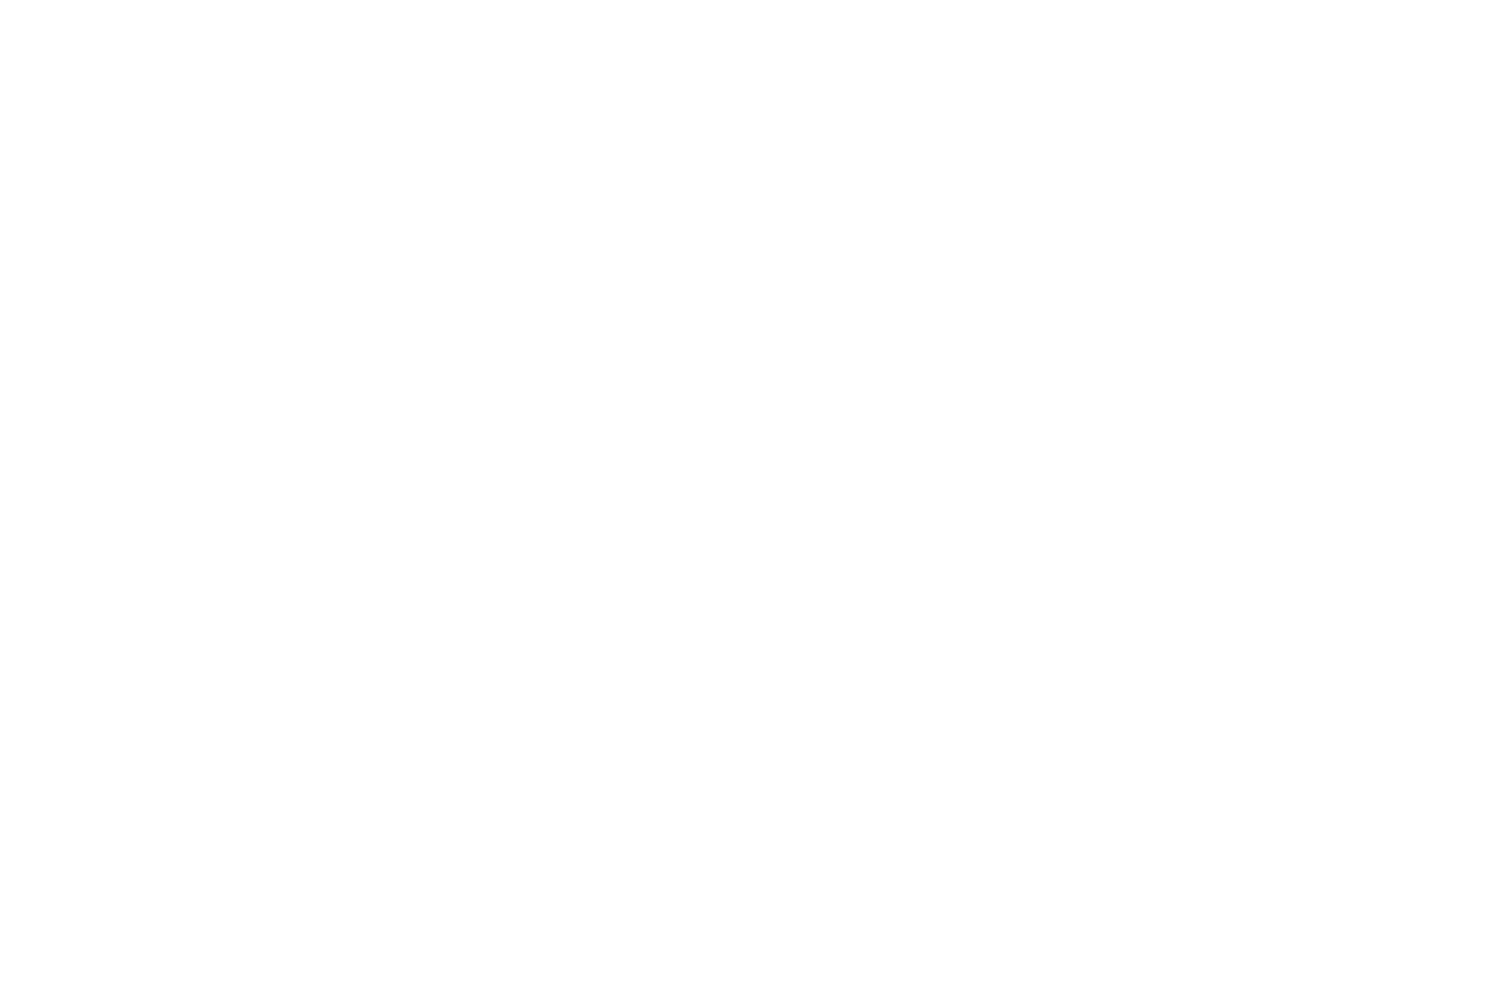

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

Once we do this, the `matplotlib` axis `ax` can make 3D plots. We'll use the `plot_surface` function. See the documentation of `Axis3D` to see what other kinds of 3D plots you can make.

https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html

In [14]:
# Make the surface plot
ax.plot_surface(X1, X2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Text(0.5, 0, 'x2')

### Example 2

Here we consider a different set of basis functions. It's important to note that basis functions can be whatever you want/need them to be, if you think the function represents your data somehow. Below, we picked basis functions that are polynomials in one or both input variables. We also picked a constant function $\varphi_3(x) = 1$. This allows us to have an "intercept" term.

* $ \varphi_1(x_1, x_2) = x^2_2$
* $ \varphi_2(x_1, x_2) = x^2_1 + x_2$
* $ \varphi_3(x_1, x_2) = 1$

This results in the model function

$$ y = \theta_1 x^2_2 + \theta_2(x^2_1 + x_2) + \theta_3$$

We see that without the constant term $\varphi_3(x) = 1$, we would not have the parameter $\theta_3$ in the above. This parameter is an example of an "intercept" term. The model predicts that at $x_1 = x_2 = 0$, $y = \theta_3$.

<IPython.core.display.Javascript object>


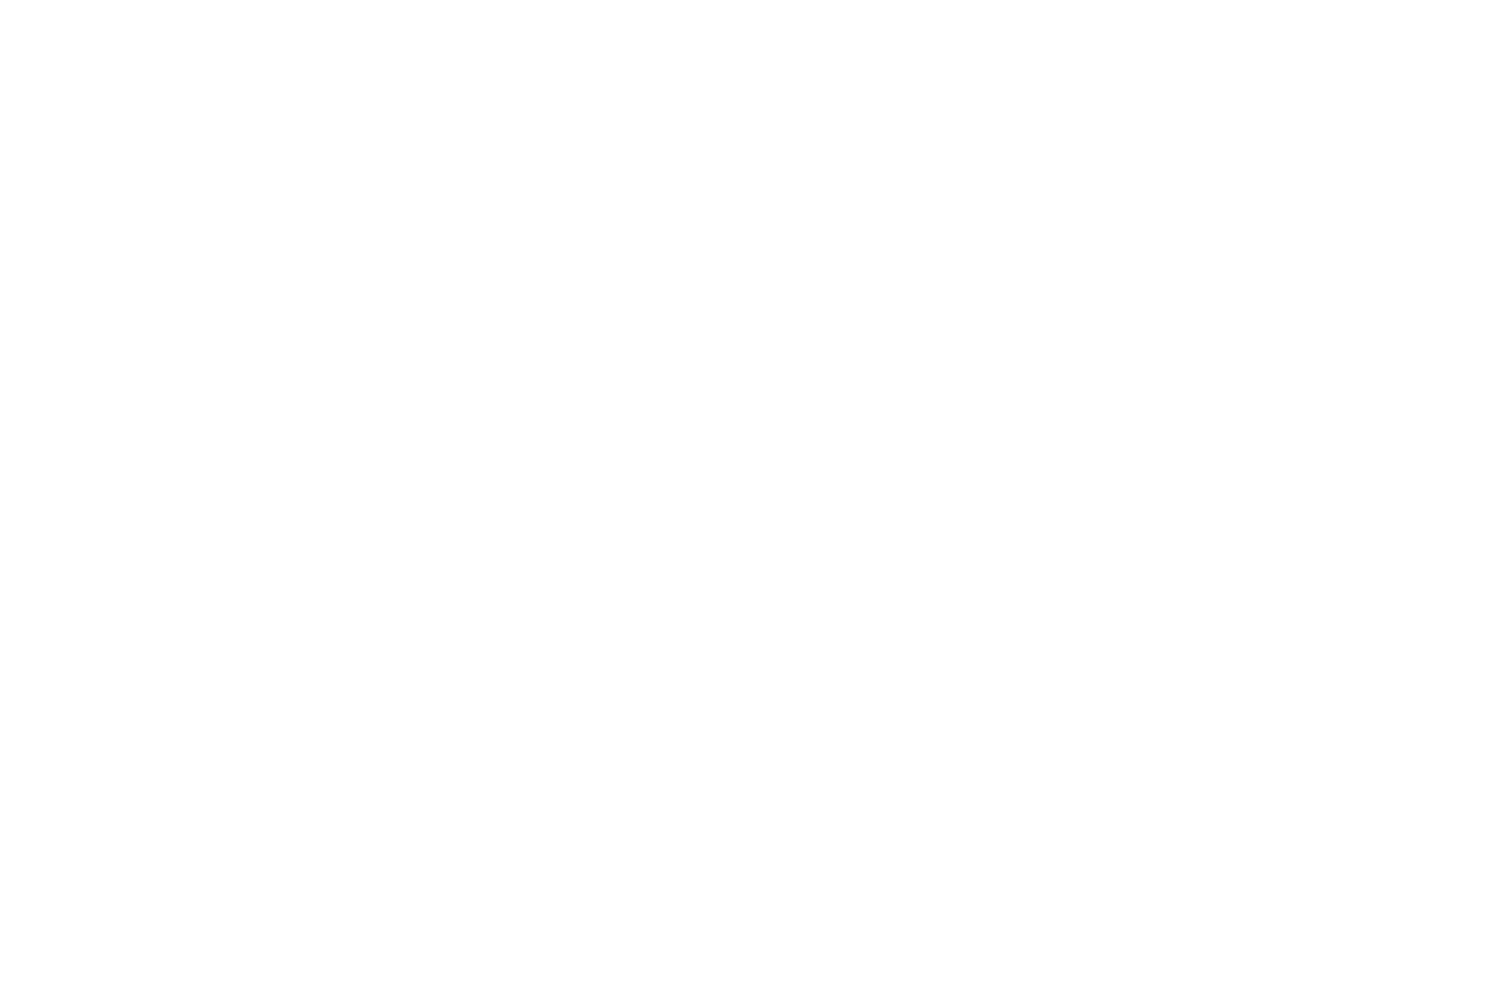

Text(0.5, 0, 'x2')

<IPython.core.display.Javascript object>


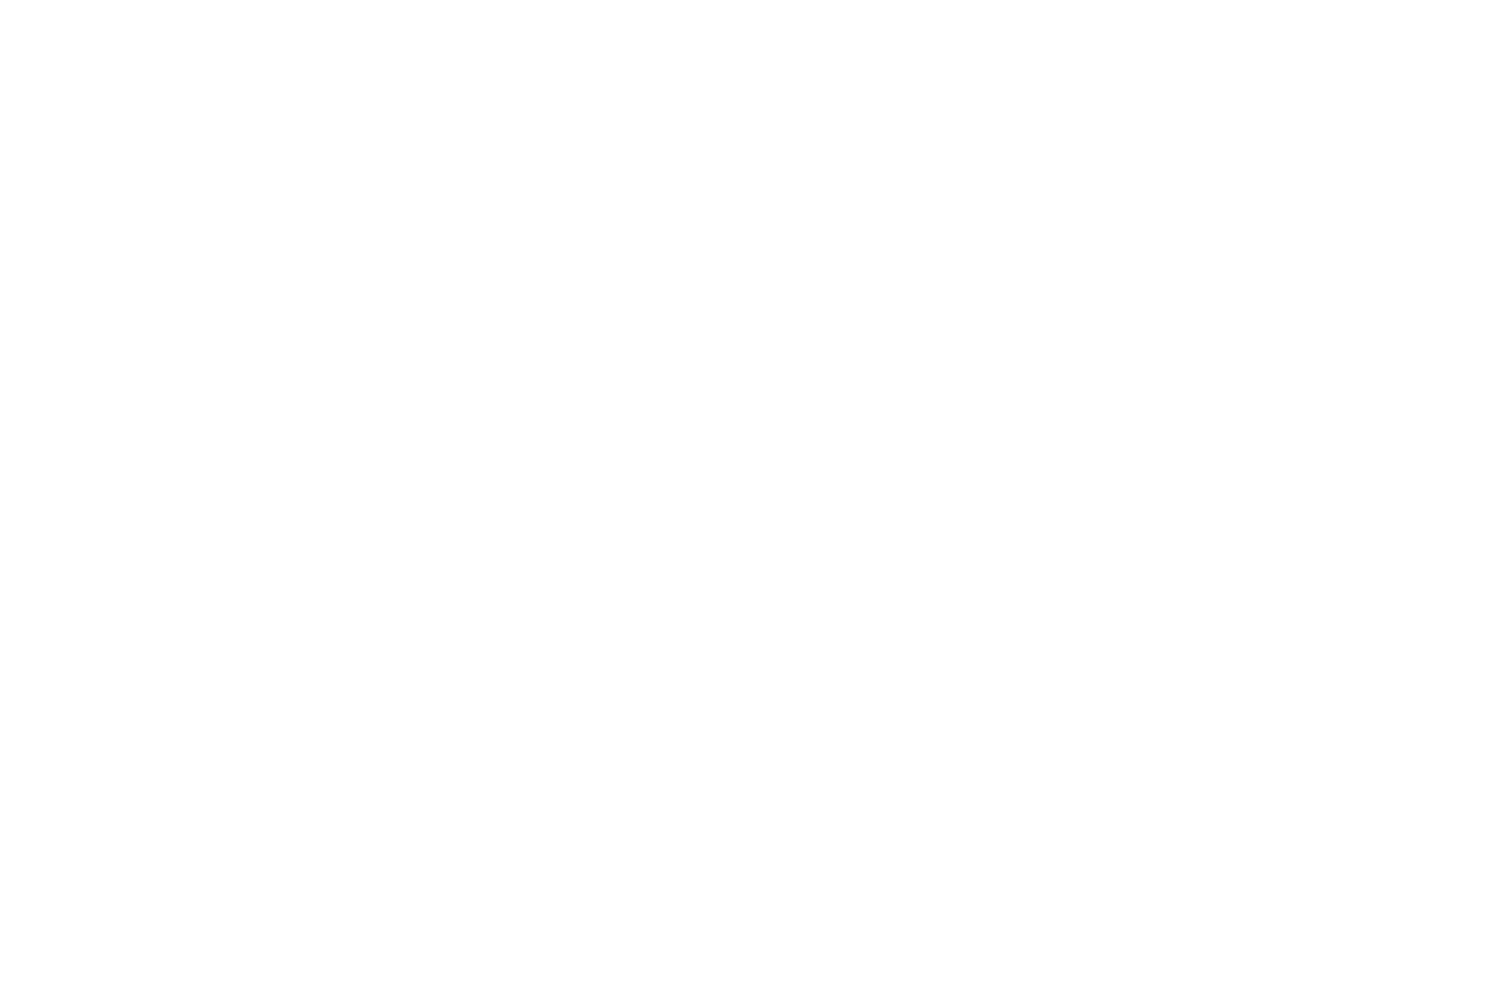

In [15]:
theta_1 = 2
theta_2 = -1
theta_3 = 10

# Evaluate the function
y = theta_1*X2**2 + theta_2*(X1**2 + X2) + theta_3

# Plot the function
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Linear Least Squares Examples

Given some data points $\left\{(\textbf x_i, y_i)\right\}_{i=1}^m$, and a linear model 
$$y = f(\textbf x,  \theta)$$
$$ = \theta_1 \varphi_2(\textbf x) + \theta_2 \varphi_2(\textbf x) + ... + \theta_n \varphi_n(\textbf x),$$
**linear least squares regression** attempts to find the value of parameters $\theta$ that minimize the cost function

$$J(\theta) = \sum_{i=1}^m \left[ y_i - f(\textbf x_i, \theta) \right]^2. $$

After some calculus, we can show that the parameter values, $\hat \theta_\text{LS}$, that minimize the above
cost function satisfies the **normal equations**

$$ \Phi^T \mathbf y = \Phi^T\Phi \theta, $$

where $\Phi$ is the design matrix, with elements $\Phi_{i,j} = \varphi_j(\mathbf x_i).$$ By solving this linear system, we get the optimal parameter values. Below we'll see several examples of how this is done.

In [16]:
# Stop making interactive plots
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

## Example 1

We'll use the data in `data/lec_14_ex1.txt`, which has 2 columns corresponding to a 1 dimensional input variable $x$ and the output variable $y$. There are several $(x, y)$ pairs in this data file. Below, we plot this data.

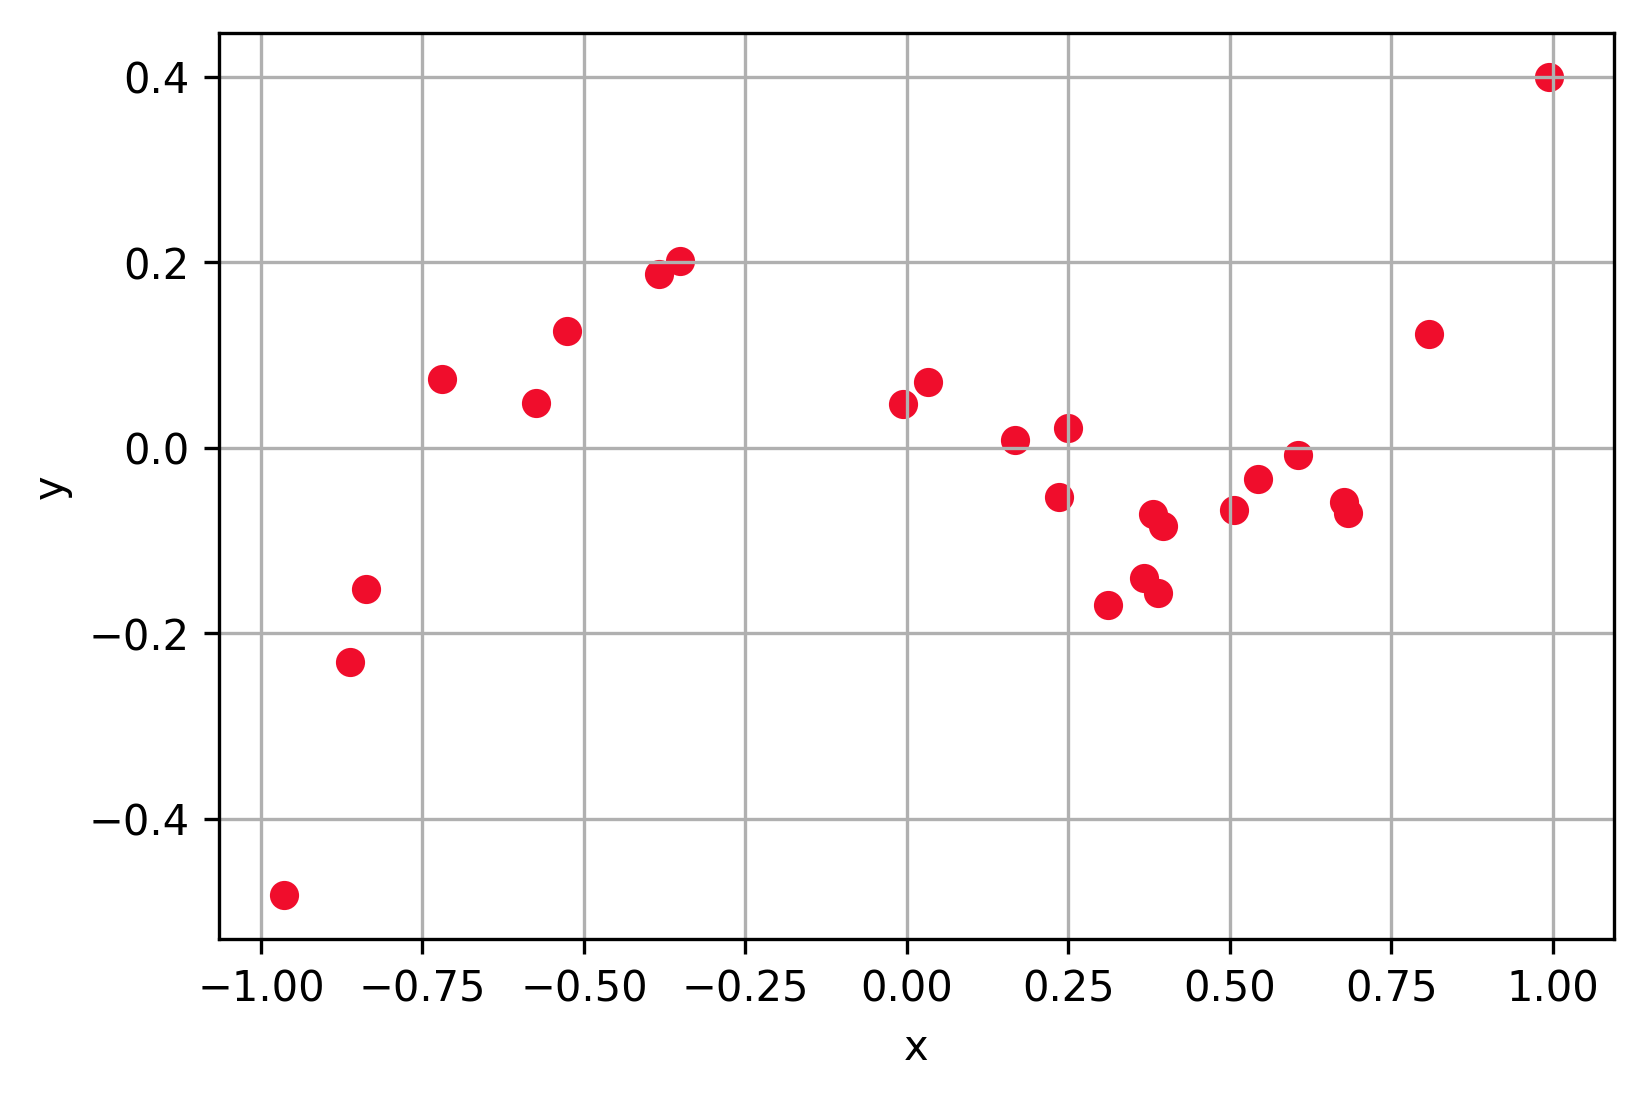

In [17]:
X = np.loadtxt('data/lec_15_ex1.txt', delimiter =',')
x = X[:,0]
y = X[:,1]

# Plot the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

The data suggests that the output is a polynomial function of the input, so as a basis, we'll use the monomial basis: $\left\{1, x, x^2, x^3\right\}$. Once we do this, we have to evaluate each of our data points on each of the basis functions to form the design matrix $\Phi$. Recall that the rows of $\Phi$ correspond to each of the basis elements evaluated at a single input value $x_i$. Columns of $\Phi$ correspond to a single basis function, evaluated at every input value $x_i$ in the data set.

In [18]:
# Evaluate basis functions for columns of the design matrix
phi_0 = np.ones(len(x))
phi_1 = x**1
phi_2 = x**2
phi_3 = x**3

# Design matrix
Phi = np.array([phi_0, phi_1, phi_2, phi_3]).T
print(Phi.shape)

(25, 4)


Once we form the design matrix, we can form the **Moore-Penrose pseudoinverse**:

$$\Phi^+ = (\Phi^T\Phi)\Phi^T.$$

We'll use the matrix multiplication operator `@`, which can be used on `numpy` arrays.

In [19]:
# Form Moore-Penrose inverse
Phi_plus = np.linalg.inv(Phi.T @ Phi) @ Phi.T

Once we have the pseudoinverse, we can get the least squares solution

$$\hat \theta_\text{LS} = \Phi^+ \mathbf y.$$

In [20]:
# Solve for least square solution
theta_LS = Phi_plus @ y
print(theta_LS)

[ 0.06321874 -0.50114373 -0.12291531  0.9831122 ]


Along with the basis functions, the parameter values $\hat \theta_\text{LS}$ yield a fully-specified model, that
we can evaluate at any $x$ to predict a value of $y$.

Below, we'll evaluate the model at 50 uniformly spaced points $x_i$ between -1 and 1. We'll also plot the data to compare the fit.

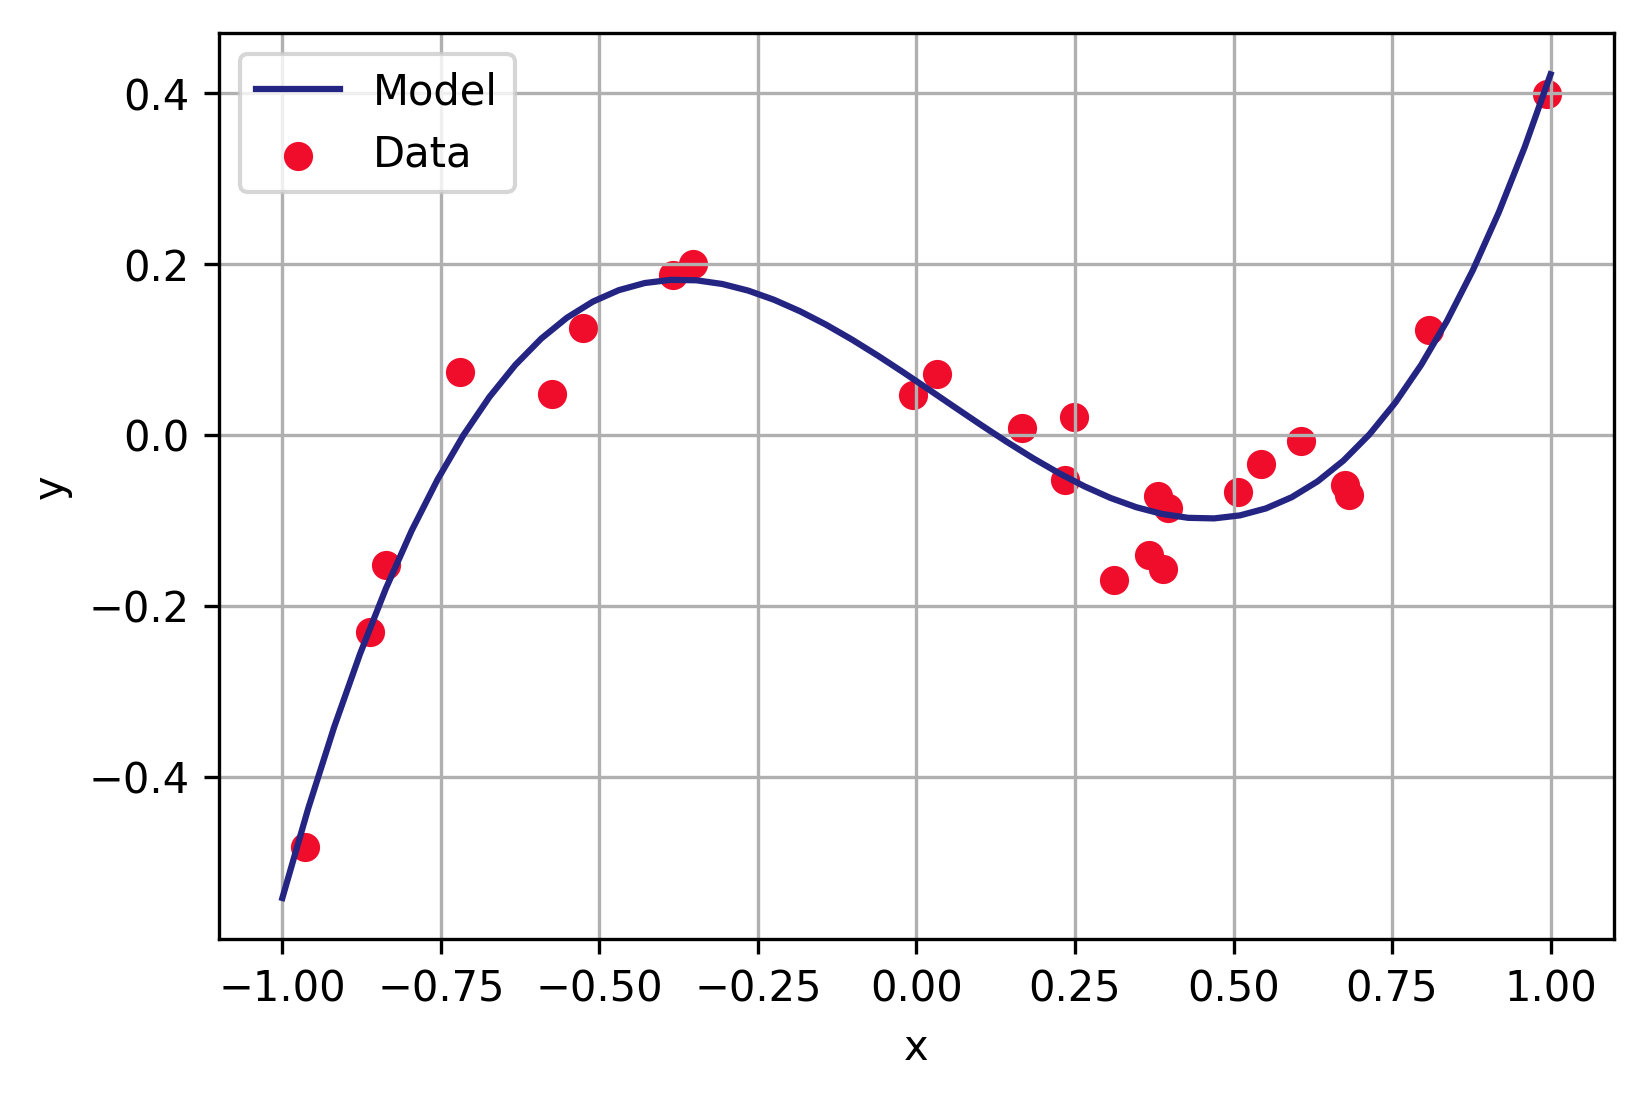

In [21]:
# Now we have a model to evaluate the function at any x
x_plot = np.linspace(-1, 1, 50)
y_plot =  theta_LS[0] + theta_LS[1]*x_plot + theta_LS[2]*x_plot**2 + theta_LS[3]*x_plot**3

# Plot the model and the data
plt.plot(x_plot, y_plot, color = COLORS[1])
plt.scatter(x, y)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Model', 'Data'])

## Example 2

This example uses the Fourier basis instead of the monomial basis. Other than that, everything else is the same.

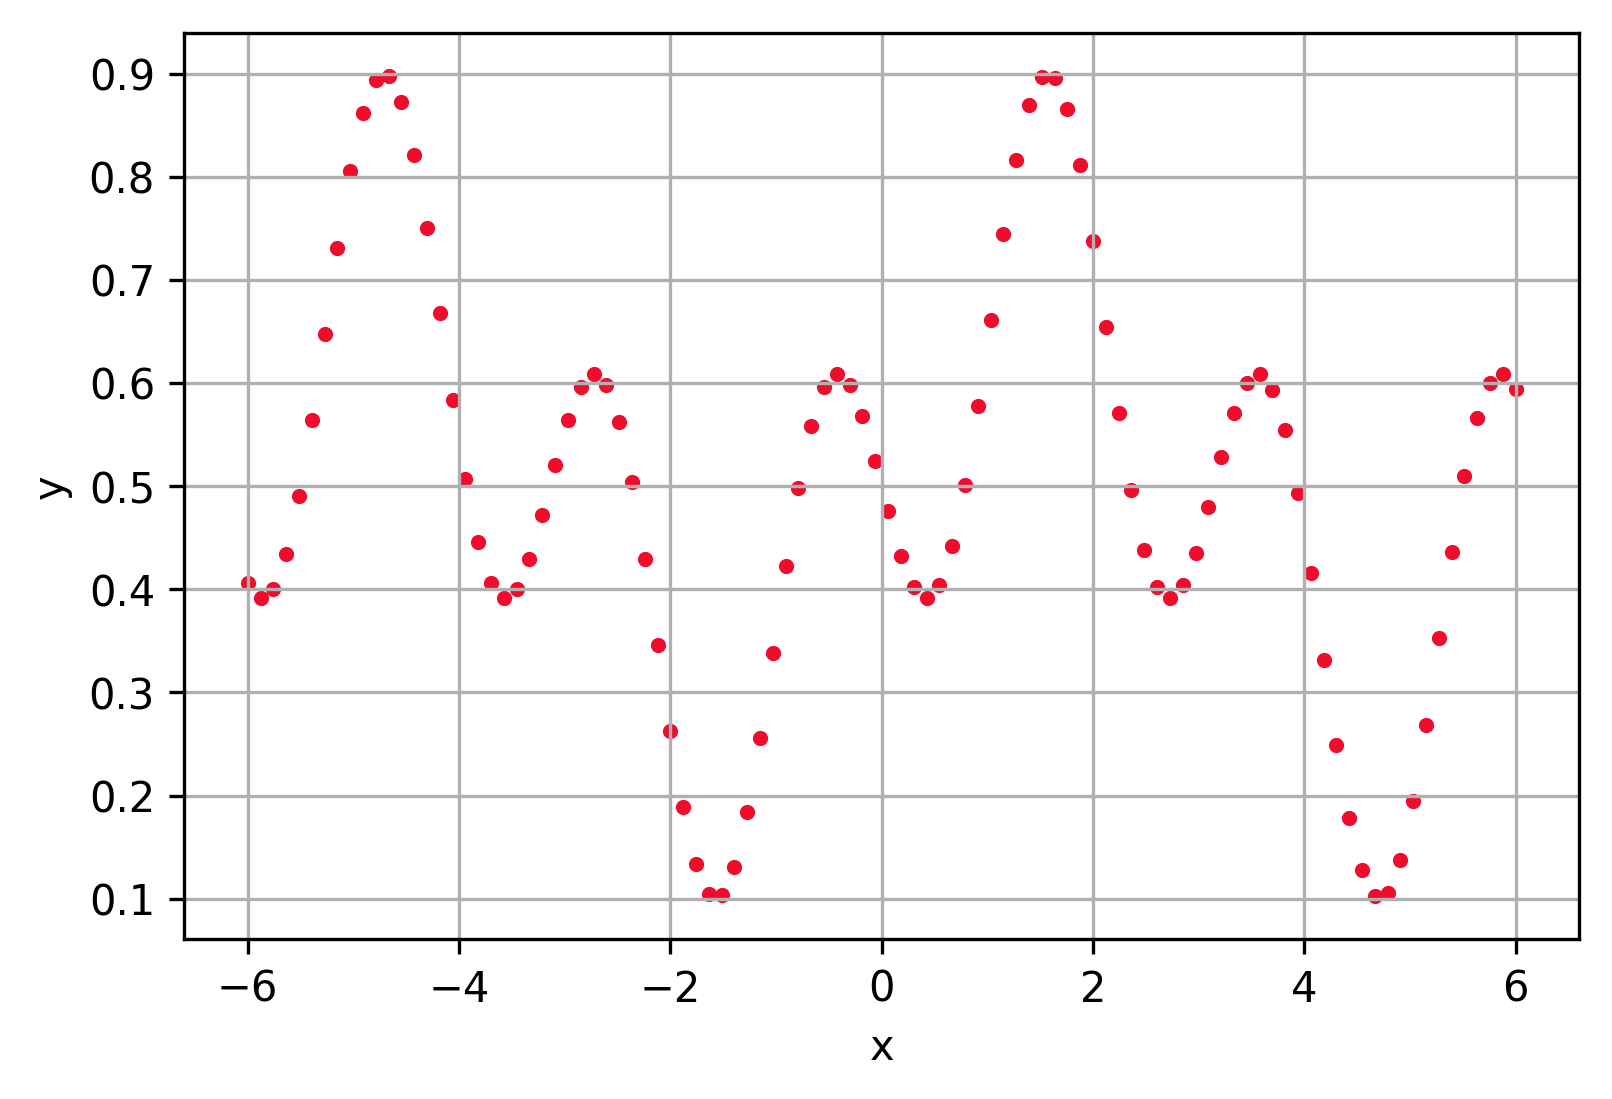

In [22]:
# Load and plot the data
X = np.loadtxt('data/lec_15_ex2.txt', delimiter =',')
x = X[:,0]
y = X[:,1]

# Plot the data
plt.scatter(x, y, s = 7)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [23]:
# Eavaluate basis functions and form design matrix
phi_0 = np.ones(len(x))
phi_1 = np.sin(x)
phi_2 = np.sin(2*x)
phi_3 = np.sin(3*x)
phi_4 = np.sin(4*x)

Phi = np.array([phi_0, phi_1, phi_2, phi_3, phi_4]).T
print(Phi.shape)

(100, 5)


In [24]:
# Form Moore-Penrose inverse
Phi_plus = np.linalg.inv(Phi.T @ Phi) @ Phi.T

# Solve for least square solution
theta_LS = Phi_plus @ y

print(theta_LS)

[ 5.00000000e-01  2.00000000e-01  5.46437895e-17 -2.00000000e-01
  3.12250226e-17]


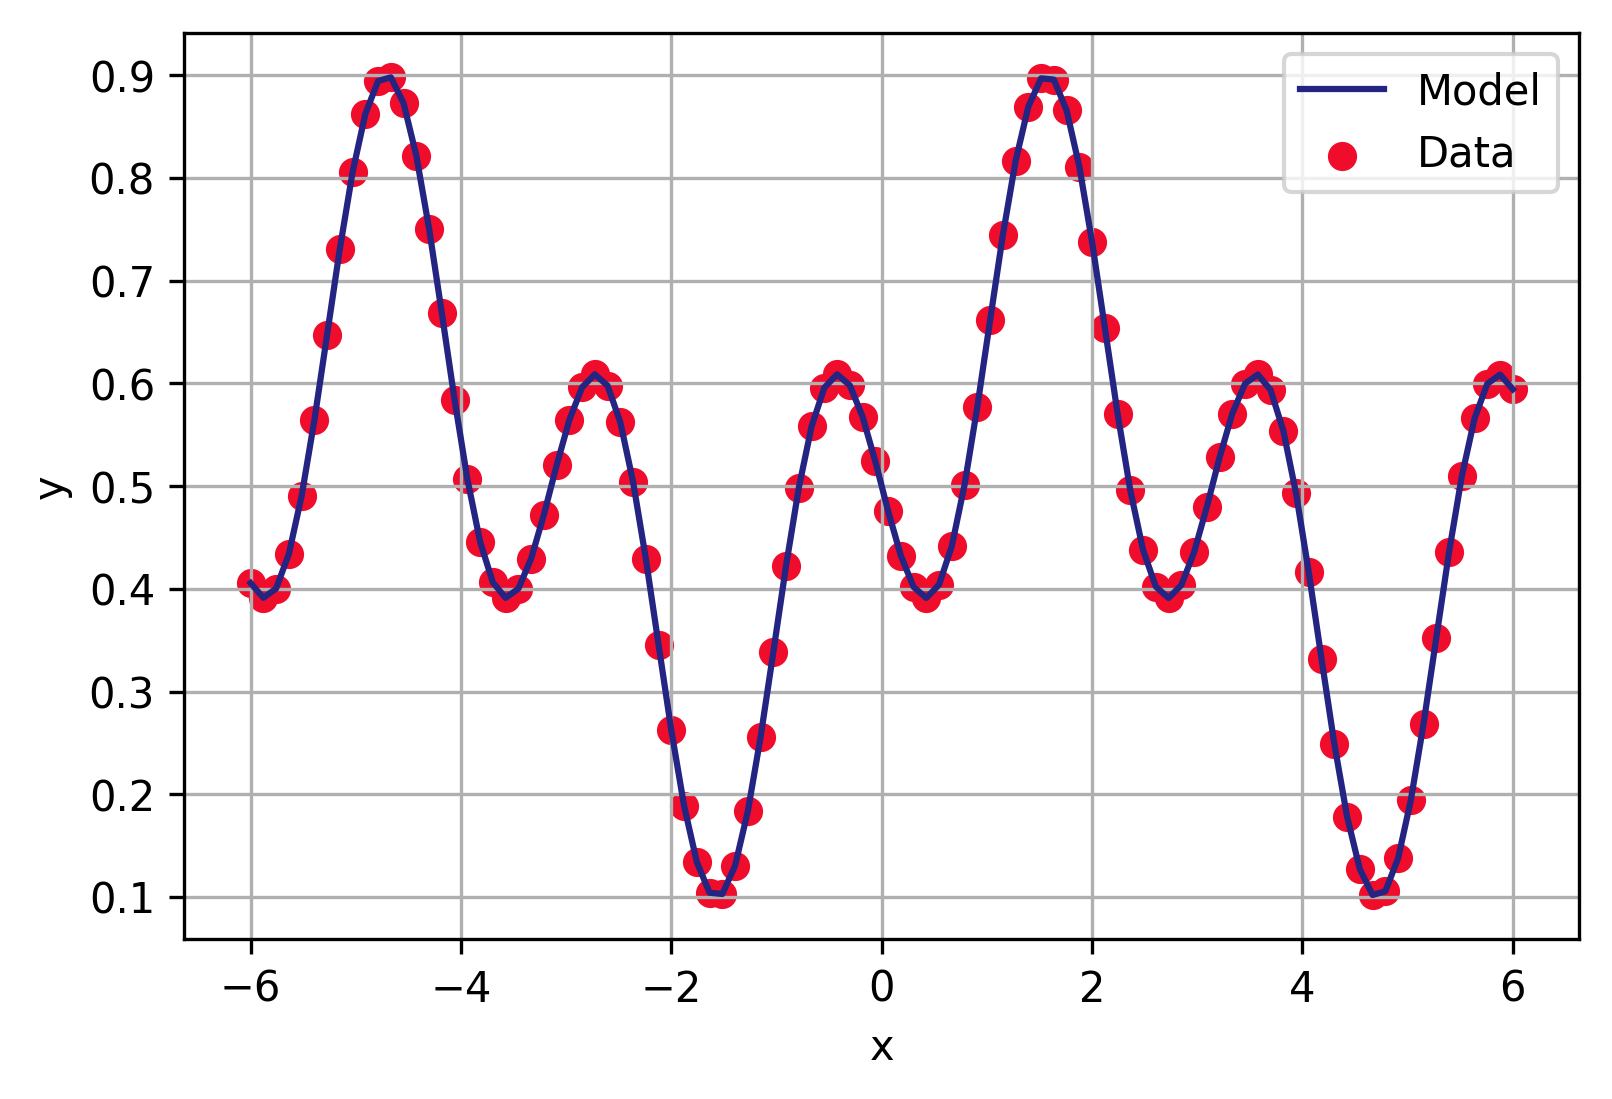

In [25]:
x_plot = np.linspace(-6, 6, 100)

# Evaluate y_plot using a for-loop
y_plot = theta_LS[0]*np.ones(len(x_plot))
for i in range(1, len(theta_LS)):
    y_plot = y_plot + theta_LS[i]*np.sin(i*x_plot)

# Plot the model and the data
plt.plot(x_plot, y_plot, color = COLORS[1])
plt.scatter(x, y)

plt.grid()

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Model', 'Data'])

# `numpy` functions for least-squares solutions

In fact, using the Moore-Penrose pseuodinverse explicitly is not that great. One of the reasons is that it necessitates the explict calculation of an inverse $(\Phi^T\Phi)^{-1}$. In practice, you really should never calculate an inverse of a matrix. (See https://www.johndcook.com/blog/2010/01/19/dont-invert-that-matrix/). It is computationally expensive, and often numerically unstable.

How, then, do we solve the normal equations

$$ \Phi^T \mathbf y = \Phi^T\Phi \theta\text{ ?}$$ 

In general, there are ways of solving the system $b = A \theta$ without inverting $A$. (In our example, $b = \Phi^T \mathbf y$, and $A = \Phi^T \Phi$.) How this is done is slightly out of the scope of this course. Instead, we'll point you to functions that solve this system the right way.

In [26]:
# First is using np.linalg.solve to solve the normal equations
theta = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)
print(theta)

[ 5.00000000e-01  2.00000000e-01  5.88785768e-17 -2.00000000e-01
  2.50158868e-17]


In [27]:
# We can additionally use np.linalg.lstsq to compute the least squares solution to the original equation
theta = np.linalg.lstsq(Phi, y, rcond = None)[0]
print(theta)

[ 5.00000000e-01  2.00000000e-01 -8.67361738e-18 -2.00000000e-01
  6.24500451e-17]


In [28]:
# We can also use the LinearRegression class in scikit-learn
from sklearn.linear_model import LinearRegression

# Instantiate a model
model = LinearRegression(fit_intercept = False)

# train model
model.fit(Phi, y)

# get the thet avalues
theta = model.coef_
print(theta)


[ 5.00000000e-01  2.00000000e-01 -8.67361738e-18 -2.00000000e-01
  6.24500451e-17]


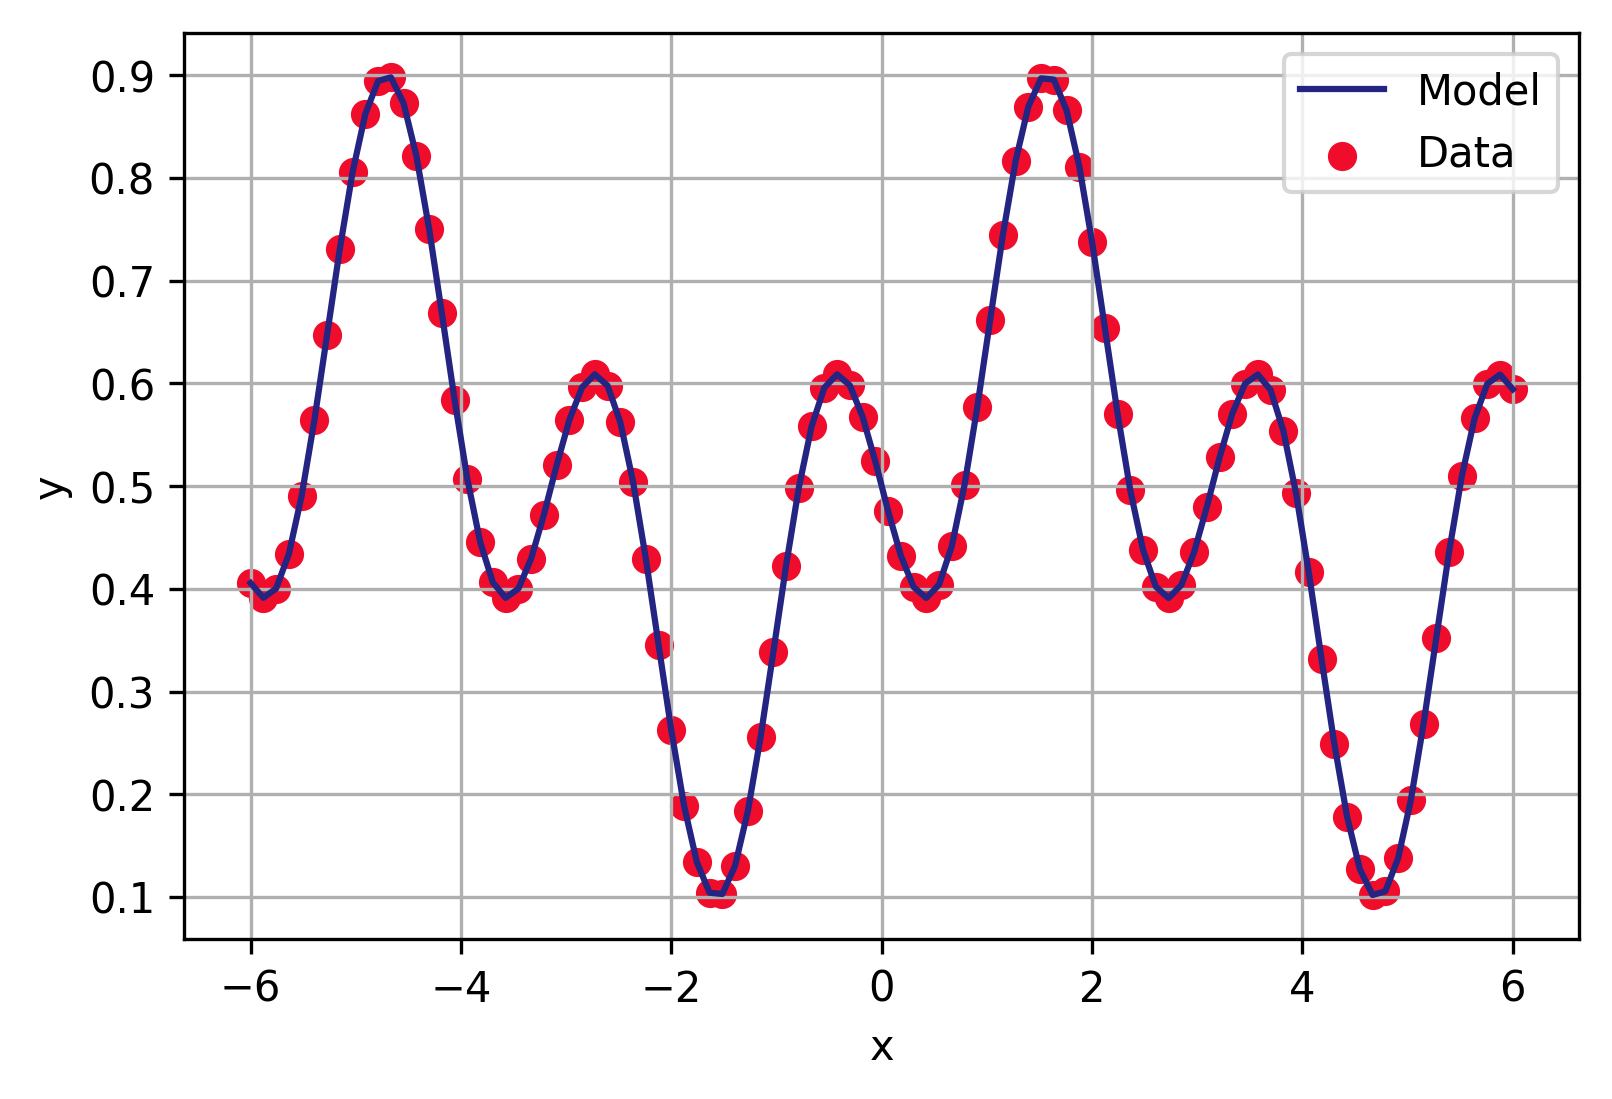

In [29]:
# Predict at any x value, but we have to evaluate the 
# x values at the basis functions, i.e. form the
# design matrix for the points we wish to predict
phi0_plot = np.ones(len(x_plot))
phi1_plot = np.sin(x_plot)
phi2_plot = np.sin(2*x_plot)
phi3_plot = np.sin(3*x_plot)
phi4_plot = np.sin(4*x_plot)
Phi_plot =  np.array([phi0_plot, phi1_plot, phi2_plot, phi3_plot, phi4_plot]).T

# Predict the response 
y_plot = model.predict(Phi_plot)

# Plot the model and the data
plt.plot(x_plot, y_plot, color = COLORS[1])
plt.scatter(x, y)

plt.grid()

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Model', 'Data'])
